<a href="https://colab.research.google.com/github/sauravkokane/Data-Science-Training/blob/master/SVM_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style='whitegrid', rc={'figure.figsize':(10,6)})

%matplotlib inline

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/META_object.csv')
df.head()

,id,name,abs_magnitude,estm_diam,estm_diam_max,orbiting_body,velocity,distance,Target
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.40105,58143623.32,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.75710,55801047.82,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.50680,67206887.72,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.07681,30396444.12,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.51948,63118626.51,False


In [ ]:
df.columns

Index(['id', 'name', 'abs_magnitude', 'estm_diam', 'estm_diam_max',
       'orbiting_body', 'velocity', 'distance', 'Target'],
      dtype='object')

In [ ]:
df.shape

(338199, 9)

In [ ]:
df.drop(columns=['id', "name"], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   abs_magnitude  338171 non-null  float64
 1   estm_diam      338171 non-null  float64
 2   estm_diam_max  338171 non-null  float64
 3   orbiting_body  338199 non-null  object 
 4   velocity       338199 non-null  float64
 5   distance       338199 non-null  float64
 6   Target         338199 non-null  bool   
dtypes: bool(1), float64(5), object(1)
memory usage: 15.8+ MB


In [ ]:
for col in df.columns:
    if df[col].nunique() < 10:
        print(f'{col}: {df[col].value_counts()}')
        print()

orbiting_body: orbiting_body
Earth    338199
Name: count, dtype: int64

Target: Target
False    295037
True      43162
Name: count, dtype: int64



In [ ]:
for col in df.columns:
    print(f'{col}: {df[col].nunique()}')

abs_magnitude: 1778
estm_diam: 1778
estm_diam_max: 1778
orbiting_body: 1
velocity: 338048
distance: 337826
Target: 2


In [ ]:
df.drop(columns=['orbiting_body'], inplace=True)

In [ ]:
df.head()

,abs_magnitude,estm_diam,estm_diam_max,velocity,distance,Target
0,19.14,0.394962,0.883161,71745.40105,58143623.32,False
1,18.50,0.530341,1.185878,109949.75710,55801047.82,True
2,21.45,0.136319,0.304818,24865.50680,67206887.72,False
3,20.63,0.198863,0.444672,78890.07681,30396444.12,False
4,22.70,0.076658,0.171412,56036.51948,63118626.51,False


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abs_magnitude,338171.0,2.293252e+01,2.911216e+00,9.250000,2.074000e+01,2.280000e+01,2.510000e+01,3.358000e+01
estm_diam,338171.0,1.578120e-01,3.138851e-01,0.000511,2.538370e-02,7.320740e-02,1.890406e-01,3.754525e+01
estm_diam_max,338171.0,3.528785e-01,7.018685e-01,0.001143,5.675968e-02,1.636967e-01,4.227075e-01,8.395373e+01
velocity,338199.0,5.106066e+04,2.639924e+04,203.346432,3.071203e+04,4.756047e+04,6.667382e+04,2.917811e+05
distance,338199.0,4.153535e+07,2.077399e+07,6745.532516,2.494540e+07,4.332674e+07,5.933961e+07,7.479865e+07


In [ ]:
df.columns

Index(['abs_magnitude', 'estm_diam', 'estm_diam_max', 'velocity', 'distance',
       'Target'],
      dtype='object')

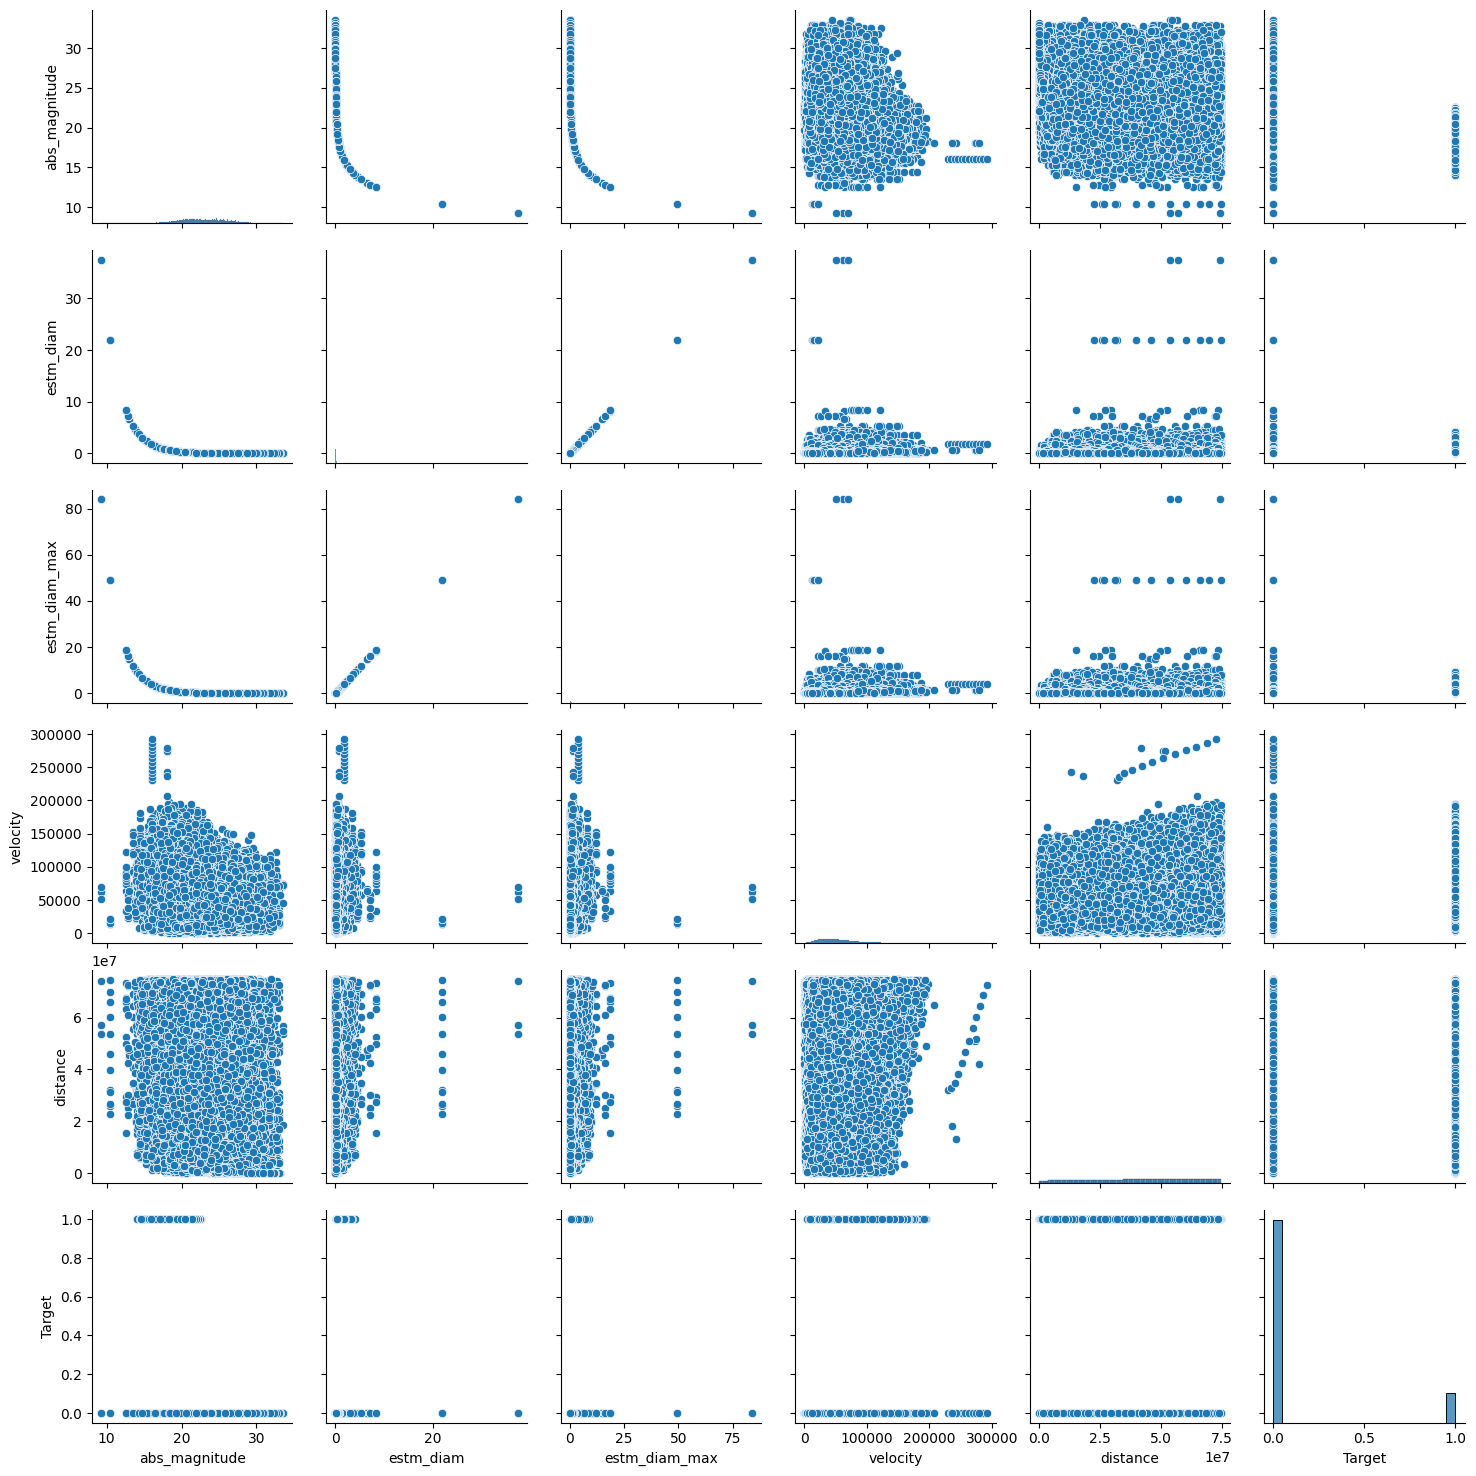

In [ ]:
sns.pairplot(df)

<Axes: xlabel='abs_magnitude', ylabel='Count'>

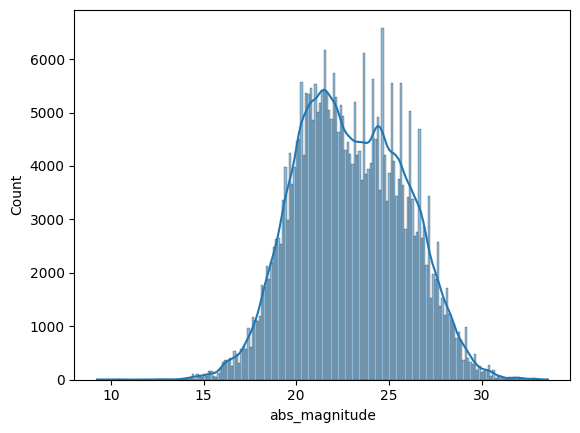

In [ ]:
sns.histplot(x='abs_magnitude', data=df, kde=True)

<Axes: xlabel='estm_diam', ylabel='Count'>

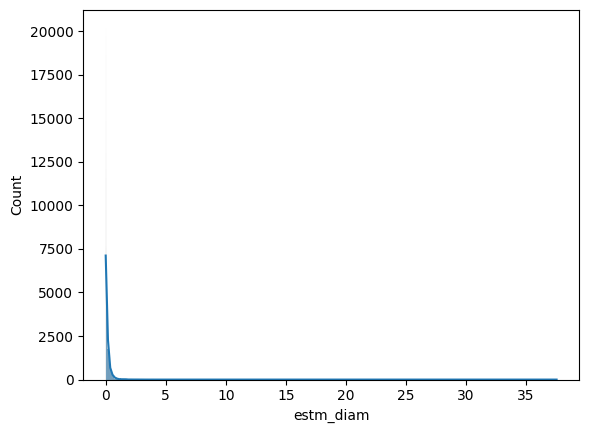

In [ ]:
sns.histplot(x='estm_diam', data=df, kde=True)

<Axes: xlabel='estm_diam_max', ylabel='Count'>

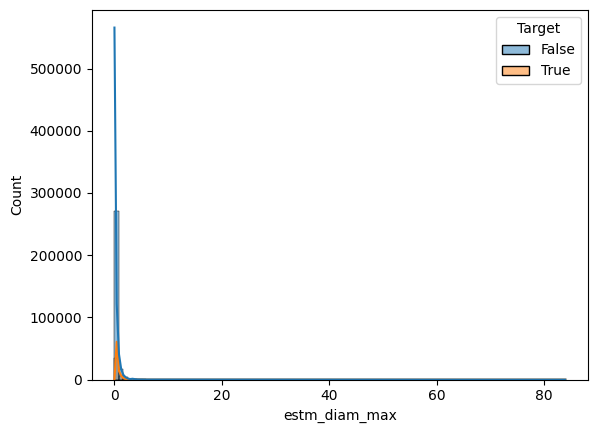

In [ ]:
sns.histplot(x='estm_diam_max', data=df, kde=True, hue='Target', bins=100)

<Axes: xlabel='velocity', ylabel='Count'>

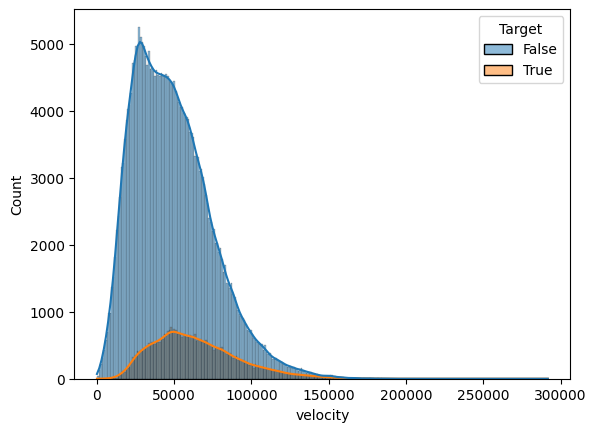

In [ ]:
sns.histplot(x='velocity', data=df, kde=True, hue='Target')

<Axes: xlabel='distance', ylabel='Count'>

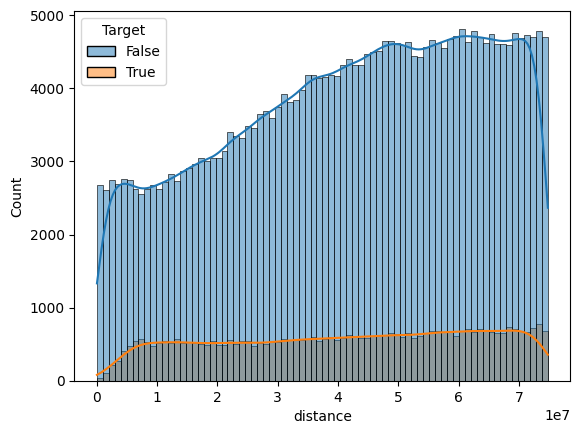

In [ ]:
sns.histplot(x='distance', data=df, kde=True, hue='Target')

<ipython-input-21-df6fde3f0eb3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=df, palette='Set2')


<Axes: xlabel='Target', ylabel='count'>

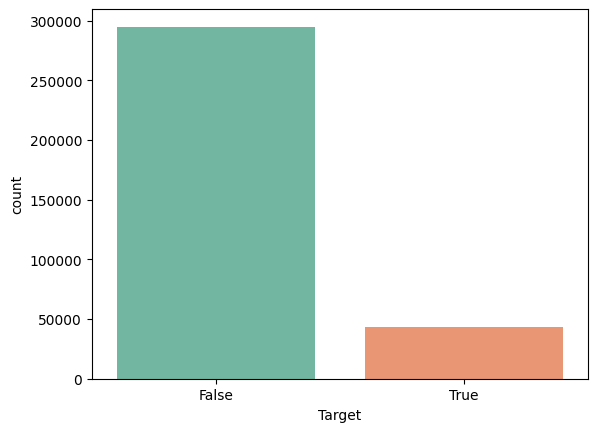

In [ ]:
sns.countplot(x='Target', data=df, palette='Set2')

In [ ]:
df.isna().sum()

,0
abs_magnitude,28
estm_diam,28
estm_diam_max,28
velocity,0
distance,0
Target,0


In [ ]:
df['abs_magnitude'].fillna(df['abs_magnitude'].mean(), inplace=True)

In [ ]:
df['estm_diam'].fillna(df['estm_diam'].mean(), inplace=True)

In [ ]:
df['estm_diam_max'].fillna(df['estm_diam_max'].mean(), inplace=True)

In [ ]:
df.corr()

,abs_magnitude,estm_diam,estm_diam_max,velocity,distance,Target
abs_magnitude,1.000000,-0.594646,-0.594646,-0.345564,-0.213516,-0.343994
estm_diam,-0.594646,1.000000,1.000000,0.222430,0.111471,0.164840
estm_diam_max,-0.594646,1.000000,1.000000,0.222430,0.111471,0.164840
velocity,-0.345564,0.222430,0.222430,1.000000,0.322587,0.187021
distance,-0.213516,0.111471,0.111471,0.322587,1.000000,-0.006540
Target,-0.343994,0.164840,0.164840,0.187021,-0.006540,1.000000


<Axes: >

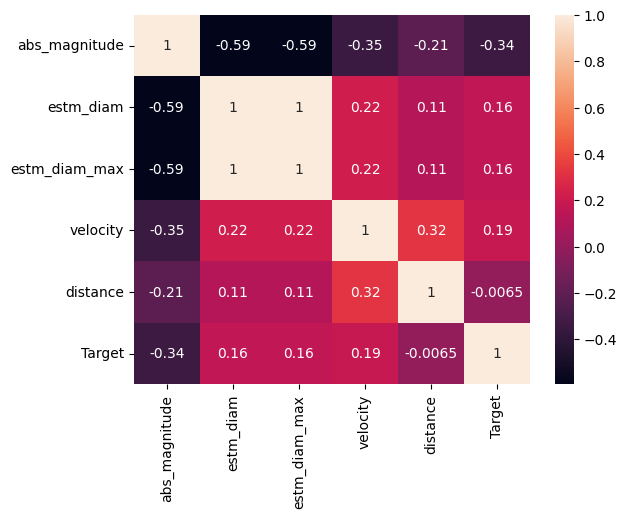

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
df['abs_magnitude'] = min_max_scaler.fit_transform(df[['abs_magnitude']])
df['estm_diam'] = standard_scaler.fit_transform(df[['estm_diam']])
df['estm_diam_max'] = standard_scaler.fit_transform(df[['estm_diam_max']])
df['velocity'] = min_max_scaler.fit_transform(df[['velocity']])
df['distance'] = min_max_scaler.fit_transform(df[['distance']])

In [ ]:
label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Target']), df['Target'], test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((270559, 5), (67640, 5), (270559,), (67640,))

In [ ]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8724275576581905


In [ ]:
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8799674748669426


In [ ]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))